# <center>  DOMACI ZADATAK 4 </center>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## IZBOR PREDIKTORA

Izbor prediktora se radi na dva nacina:
* na osnovu koeficijenta korelacije sa ciljnom promenljivom
* pomocu wrapper algoritma </b></b>

U slucaju prvog nacina skaliranje podataka nece uticati na konacan rezultat jer se zasebno isputuje korelacija svakog prediktora za izlaznom promenljivom. Sa druge strane, za wrapper algoritam podaci treba da budu skalirani. Funkcije **best_rang** i **forward_selecton** vracaju listu prediktora koji su rasporedjeni od najboljeg ka najgorem.

In [2]:
data = pd.read_csv('data_1.csv').to_numpy()
X = data[:,:-1]
y = data[:,-1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
from domaci_4 import forward_selection, rang_features

best_rang = rang_features(X, y)
best_forward = forward_selection(X, y)

best_rang_2 = best_rang[0:2]
best_forward_2 = best_forward[0:2]

print('Najbolji prediktori za prvu metodu su '+ str(best_rang_2))
print('Najbolji prediktori za drugu metodu su '+ str(best_forward_2))

Najbolji prediktori za prvu metodu su [12, 0]
Najbolji prediktori za drugu metodu su [12, 0]


## OBUCAVANJE STABLA

Greska klasifikacije na trening i validacionom skupu, kao i dubina na kojoj ce svi listovi biti homogeni zavisi od izbora prediktora. Ukoliko izaberemo najbolje prediktore, tada ce dubina stabla biti manja jer ce se brzo naci homogeni listovi. Pored toga, greska na validacionom skupu ce biti manja. To pokazuju slike ispod, gde se vidi da je veca dubina stabla potrebna kada su prediktori losiji, kao i da greske opadaju sporije u tom slucaju.

In [4]:
from sklearn.tree import plot_tree
indices = np.arange(X.shape[0])

X_train, X_val, y_train, y_val, ind_train, ind_val = train_test_split(X[:,best_forward_2], y, indices, test_size = 0.25, random_state = 123)

all_depths = np.arange(1,20,1)
error_train = []
error_val = []

for depth in all_depths:
    
    DTC = DecisionTreeClassifier(max_depth = depth)
    DTC.fit(X_train, y_train)
   
    pred_train = DTC.predict(X_train)
    pred_val = DTC.predict(X_val)
    
    error_train.append(mean_squared_error(y_train, pred_train))
    error_val.append(mean_squared_error(y_val, pred_val))
 

In [5]:
not_best_feat = [11, 3]
X_train, X_val, y_train, y_val, ind_train, ind_val = train_test_split(X[:,not_best_feat], y, indices, test_size = 0.3, random_state = 123)

all_depths = np.arange(1,20,1)
error_train_2 = []
error_val_2 = []

for depth in all_depths:
    
    DTC2 = DecisionTreeClassifier(max_depth = depth)
    DTC2.fit(X_train, y_train)
   
    pred_train = DTC2.predict(X_train)
    pred_val = DTC2.predict(X_val)
    
    error_train_2.append(mean_squared_error(y_train, pred_train))
    error_val_2.append(mean_squared_error(y_val, pred_val))

Text(0.5, 1.0, 'Greska klasifikacije sa prediktorima 11 i 3')

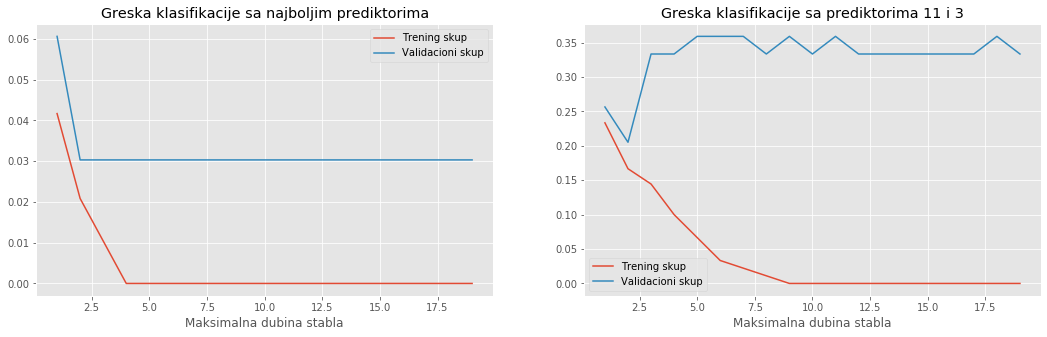

In [6]:
fig, axes = plt.subplots(1,2,figsize = (18, 5))

axes[0].plot(all_depths, error_train)
axes[0].plot(all_depths, error_val)
axes[0].legend(['Trening skup', 'Validacioni skup'])
axes[0].set_xlabel('Maksimalna dubina stabla')
axes[0].set_title('Greska klasifikacije sa najboljim prediktorima')
axes[1].plot(all_depths, error_train_2)
axes[1].plot(all_depths, error_val_2)
axes[1].legend(['Trening skup', 'Validacioni skup'])
axes[1].set_xlabel('Maksimalna dubina stabla')
axes[1].set_title('Greska klasifikacije sa prediktorima 11 i 3')

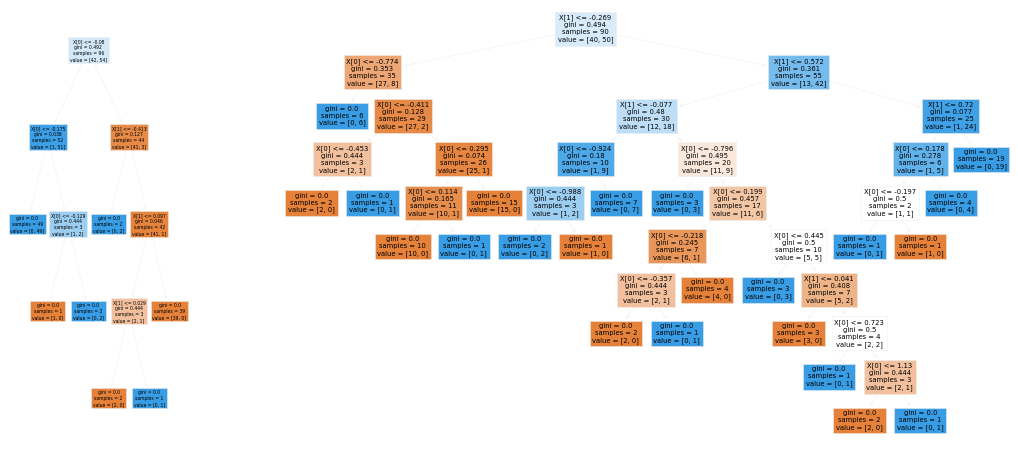

In [7]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(18,8))

_=plot_tree(DTC, ax=ax[0], filled=True)
_=plot_tree(DTC2, ax=ax[1], filled=True)

In [8]:
def plot_decision_boundry(X, ax): 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    fig.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)

    Z = DTC.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha = 0.4)

Obzirom da se ne moze lepo uociti podobucavanje i preobucavanje kada se koriste najbolji prediktori, koriscena su neka druga dva koja su rangirana u sredini otprilike. Kod najboljih prediktora nema preobucavanja, sto se moze videti na slici gore levo. Sa prediktorima 11 i 3, preobucavanje pocinje sa dubinom stabla 5, pa su uzete sledece dubine stabla za prikaz klasifikacije sa podobucavanje, preobucavanjem i "dobrom" klasifikacijom:

Tacnost za dubine redom [1, 2, 20] na trening skupu: [0.767, 0.833, 1.0]
Tacnost za dubine redom [1, 2, 20] na validacionom skupu: [0.744, 0.795, 0.641]


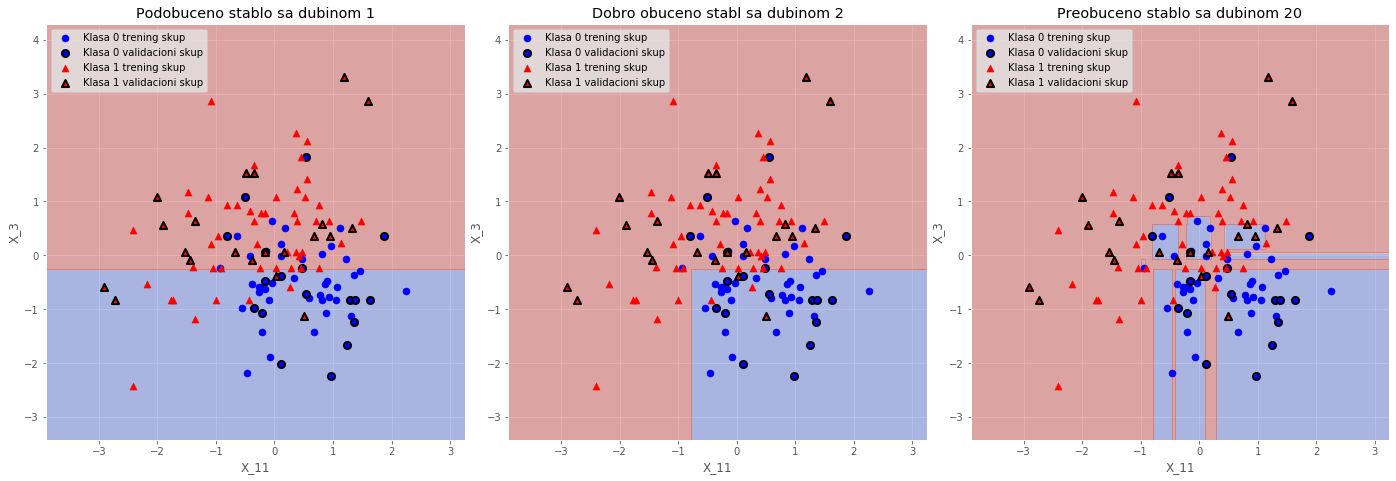

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (20, 7))


idx_1_val = ind_val[y_val==1]
idx_1_train = ind_train[y_train==1]
idx_0_val = ind_val[y_val==0]
idx_0_train = ind_train[y_train==0]

depths = [1, 2, 20]
X_2 = X[:,not_best_feat] 

acc_train = []
acc_val = []

for i, d in enumerate(depths):

    DTC = DecisionTreeClassifier(max_depth = d)
    DTC.fit(X_train, y_train) 
    
    acc_train.append(round(accuracy_score(y_train, DTC.predict(X_train)),3))
    acc_val.append(round(accuracy_score(y_val, DTC.predict(X_val)),3))

    plot_decision_boundry(X_2, axes[i]) 
    axes[i].scatter(X_2[idx_0_train,0], X_2[idx_0_train,1], marker = 'o', c = 'b', s = 50, label = 'Klasa 0 trening skup')
    axes[i].scatter(X_2[idx_0_val,0],X_2[idx_0_val,1],marker = 'o', c='b', s = 50, edgecolor='k', linewidths = 2, label = 'Klasa 0 validacioni skup')
    axes[i].scatter(X_2[idx_1_train,0], X_2[idx_1_train,1], marker = '^', c = 'r', s = 50, label = 'Klasa 1 trening skup')
    axes[i].scatter(X_2[idx_1_val,0],X_2[idx_1_val,1],marker = '^', c = 'r', s = 50,edgecolor = 'k', linewidths = 2, label = 'Klasa 1 validacioni skup')
    
    axes[i].set_xlabel('X_'+str(not_best_feat[0]))
    axes[i].set_ylabel('X_'+str(not_best_feat[1]))
    axes[i].legend()
    


axes[0].set_title('Podobuceno stablo sa dubinom '+ str(depths[0]))
axes[1].set_title('Dobro obuceno stabl sa dubinom '+ str(depths[1]))
axes[2].set_title('Preobuceno stablo sa dubinom '+ str(depths[2]))

print('Tacnost za dubine redom ' + str(depths) + ' na trening skupu: ' + str(acc_train))
print('Tacnost za dubine redom ' + str(depths) + ' na validacionom skupu: ' + str(acc_val))



## ANSAMBLI

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

data_2 = pd.read_csv('data_2.csv').to_numpy()
X = data_2[:,:-1]
y = data_2[:,-1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 123)

### Random Forest | Dubina stabla 

Povecanje maksimalne dubine stabla tacnost na trening skupu raste, dok kod validacionog skupa raste sve do nekog broja stabala u ansamblu, kada povecanjem maksimalne dubine stabla ne mozemo da poboljsamo tacnost znacajno. Ocekivano je da sa povecanjem dodje do preobucavanja, medjutim to nije slicaj kod Random Forest klasifikatora obzirom da su oni otporni na preobucavanje.

In [11]:
N_trees = np.arange(1,100,5)
depth = np.arange(2,9,2)

all_scores = np.zeros((len(N_trees), len(depth)))
all_scores_val = np.zeros((len(N_trees), len(depth)))

for i, n in enumerate(N_trees):
    for j, d in enumerate(depth):
        
        rfc = RandomForestClassifier(n_estimators=n, max_depth=d )
        rfc.fit(X_train, y_train)
        
        pred_train = rfc.predict(X_train)
        pred_val = rfc.predict(X_val)
        
        score_train = accuracy_score(y_train, pred_train)
        score_val = accuracy_score(y_val, pred_val)
        
        all_scores[i, j] = score_train
        all_scores_val[i, j] = score_val

Text(0.5, 1.0, 'Tacnost na validacionom skupu')

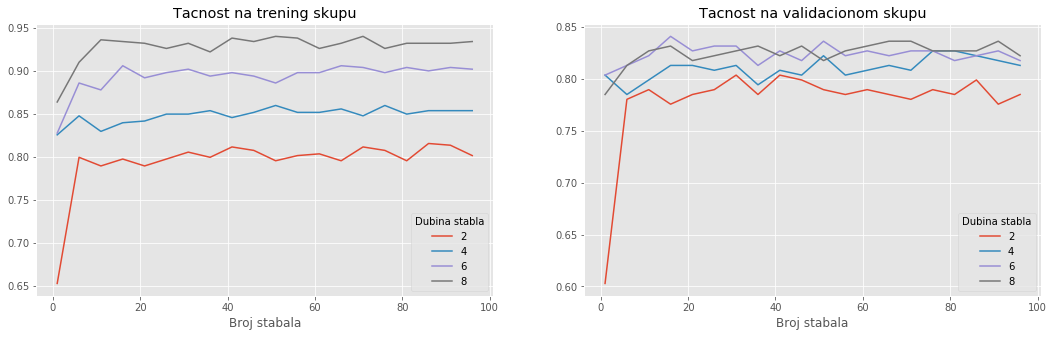

In [12]:
fig, axes = plt.subplots(1,2,figsize = (18, 5))

for j in range(0, len(depth)):
    axes[0].plot(N_trees, all_scores[:, j], label=str(depth[j]))
    axes[1].plot(N_trees, all_scores_val[:, j], label=str(depth[j]))    
axes[0].legend(title='Dubina stabla')
axes[1].legend(title='Dubina stabla')
axes[0].set_xlabel('Broj stabala')
axes[1].set_xlabel('Broj stabala')
axes[0].set_title('Tacnost na trening skupu')
axes[1].set_title('Tacnost na validacionom skupu')

### Random Forest | Maksimalan broj odlika po split-u 

Za ovu kombinaciju algoritma i hiperparametra ne uocavam nikakvu pravilnost menjanjem vrednosti maksimalnog broja odlika za najbolju podelu.

In [13]:
features = np.arange(2,6,1)

all_scores = np.zeros((len(N_trees), len(features)))
all_scores_val = np.zeros((len(N_trees), len(features)))

for i, n in enumerate(N_trees):
    for j, f in enumerate(features):
        
        rfc = RandomForestClassifier(n_estimators = n, max_features = f)
        rfc.fit(X_train, y_train)
        
        pred_train = rfc.predict(X_train)
        pred_val = rfc.predict(X_val)
        
        score_train = accuracy_score(y_train, pred_train)
        score_val = accuracy_score(y_val, pred_val)
        
        all_scores[i, j] = score_train
        all_scores_val[i, j] = score_val

Text(0.5, 1.0, 'Tacnost na validacionom skupu')

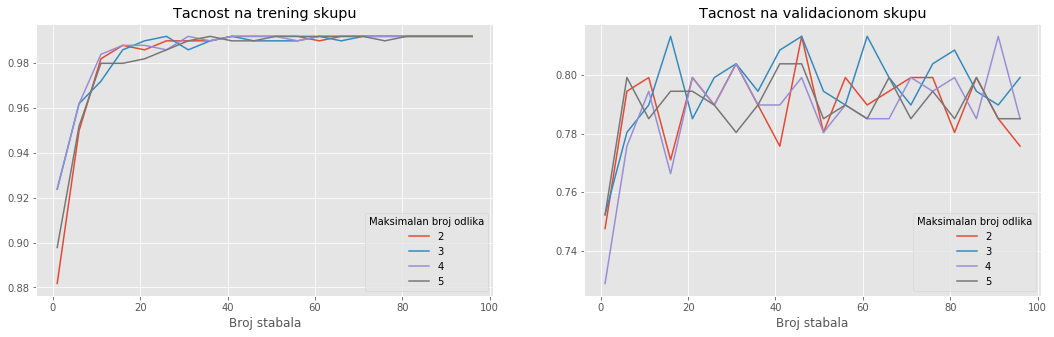

In [14]:
fig, axes = plt.subplots(1,2,figsize = (18, 5))

for j in range(0, len(features)):
    axes[0].plot(N_trees, all_scores[:, j], label=str(features[j]))
    axes[1].plot(N_trees, all_scores_val[:, j], label=str(features[j]))
axes[0].legend(title='Maksimalan broj odlika')
axes[1].legend(title='Maksimalan broj odlika')
axes[0].set_xlabel('Broj stabala')
axes[1].set_xlabel('Broj stabala')
axes[0].set_title('Tacnost na trening skupu')
axes[1].set_title('Tacnost na validacionom skupu')

### Gradient Boosting | Stopa ucenja

Ocekuje se da za manju stopu ucenja tacnost sporije raste. To se jasno vidi na krivoj za trening skup, dok se na krivoj za validacioni skup uocava opadanje tacnosti za vece vrednosti stope ucenja sto ukazuje na postojanje preobucavanja odnosno nepostojanje regularizacije.

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rate = [0.01, 0.1, 0.4, 1]

all_scores = np.zeros((len(N_trees), len(learning_rate)))
all_scores_val = np.zeros((len(N_trees), len(learning_rate)))

for i, n in enumerate(N_trees):
    for j, lr in enumerate(learning_rate):
        
        gbc = GradientBoostingClassifier(n_estimators = n, learning_rate = lr)
        gbc.fit(X_train, y_train)
        
        pred_train = gbc.predict(X_train)
        pred_val = gbc.predict(X_val)
        
        score_train = accuracy_score(y_train, pred_train)
        score_val = accuracy_score(y_val, pred_val)
        
        all_scores[i, j] = score_train
        all_scores_val[i, j] = score_val

Text(0.5, 1.0, 'Tacnost na validacionom skupu')

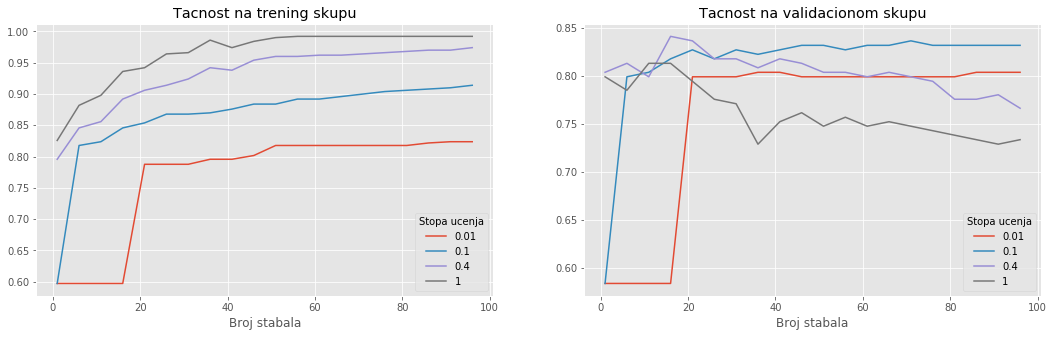

In [16]:
fig, axes = plt.subplots(1,2,figsize = (18, 5))

for j in range(0, len(learning_rate)):
    axes[0].plot(N_trees, all_scores[:, j], label=str(round(learning_rate[j],2)))
    axes[1].plot(N_trees, all_scores_val[:, j], label=str(round(learning_rate[j],2)))
axes[0].legend(title='Stopa ucenja')
axes[1].legend(title='Stopa ucenja')
axes[0].set_xlabel('Broj stabala')
axes[1].set_xlabel('Broj stabala')
axes[0].set_title('Tacnost na trening skupu')
axes[1].set_title('Tacnost na validacionom skupu')

### Gradient Boosting | Dubina stabla

Sa grafika za validacioni skup se vidi da za veci broj stabala u ansambu (vise od 10) tacnost na oba skupa ne varira znacajno. Medjutim, tacnost je veca ukoliko je maksimalna dubina stabla veca sve do neke odredjene vrednosti, nakon cega ona pocinje da opada sa povecanjem broja stabala i to brze opada ukoliko je maksimalna dubina veca. Na krivoj za trening skup tacnost uvek raste sa povecanjem maksimalne dubine stabla tj. sve dok se ne dostigne maksimalna tacnost. 

In [17]:
depths = np.arange(2,9,2)
all_scores = np.zeros((len(N_trees), len(depths)))
all_scores_val = np.zeros((len(N_trees), len(depths)))

for i, n in enumerate(N_trees):
    for j, d in enumerate(depths):
        
        gbc = GradientBoostingClassifier(n_estimators = n, max_depth=d)
        gbc.fit(X_train, y_train)
        
        pred_train = gbc.predict(X_train)
        pred_val = gbc.predict(X_val)
        
        score_train = accuracy_score(y_train, pred_train)
        score_val = accuracy_score(y_val, pred_val)
        
        all_scores[i, j] = score_train
        all_scores_val[i, j] = score_val

Text(0.5, 1.0, 'Tacnost na validacionom skupu')

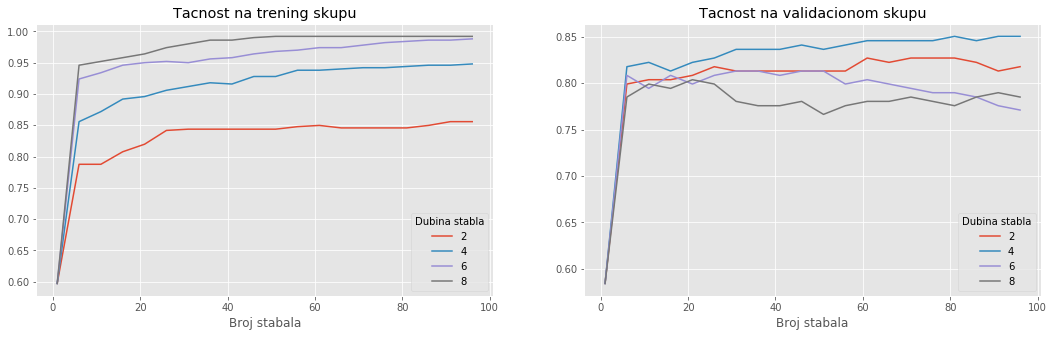

In [18]:
fig, axes = plt.subplots(1,2,figsize = (18, 5))

for j in range(0, len(depths)):
    axes[0].plot(N_trees, all_scores[:, j], label=str(round(depths[j],1)))
    axes[1].plot(N_trees, all_scores_val[:, j], label=str(round(depths[j],1)))
    
axes[0].legend(title='Dubina stabla')
axes[1].legend(title='Dubina stabla')
axes[0].set_xlabel('Broj stabala')
axes[1].set_xlabel('Broj stabala')
axes[0].set_title('Tacnost na trening skupu')
axes[1].set_title('Tacnost na validacionom skupu')